# platetools

Here are some examples of the plots available in platetools.

In [1]:
library(platetools)
library(ggplot2)
library(viridis)

# set figure size for jupyter notebook
options(repr.plot.width = 6)
options(repr.plot.height = 4)

## Manipulating plate data

We can generate well labels with the function `num_to_well()`

In [19]:
num_to_well(1:14)

[1] "A01" "A02" "A03" "A04" "A05" "A06" "A07" "A08" "A09" "A10" "A11" "A12"
[13] "B01" "B02"

In [20]:
num_to_well(1:14, plate = 384)

[1] "A01" "A02" "A03" "A04" "A05" "A06" "A07" "A08" "A09" "A10" "A11" "A12"
[13] "A13" "A14"

We can also convert alpha-numerical well labels into row and column positions on a plate.

In [26]:
# generate example dataframe of well label and values
example_df <- data.frame(well = num_to_well(10:19),
                         val = rnorm(10))
head(example_df)

well        val
1  A10 -1.3174385
2  A11  0.3881026
3  A12 -0.3403455
4  B01  1.1099772
5  B02  0.7078960
6  B03  1.0400691

In [27]:
# calculate row and column values from well labels
out <- plate_map(data = example_df$val,
                 well = example_df$well)
head(out)

well Row Column     values
1  A10   1     10 -1.3174385
2  A11   1     11  0.3881026
3  A12   1     12 -0.3403455
4  B01   2      1  1.1099772
5  B02   2      2  0.7078960
6  B03   2      3  1.0400691

## Plotting plate maps

These functions allow us to plot platemaps from well labels.

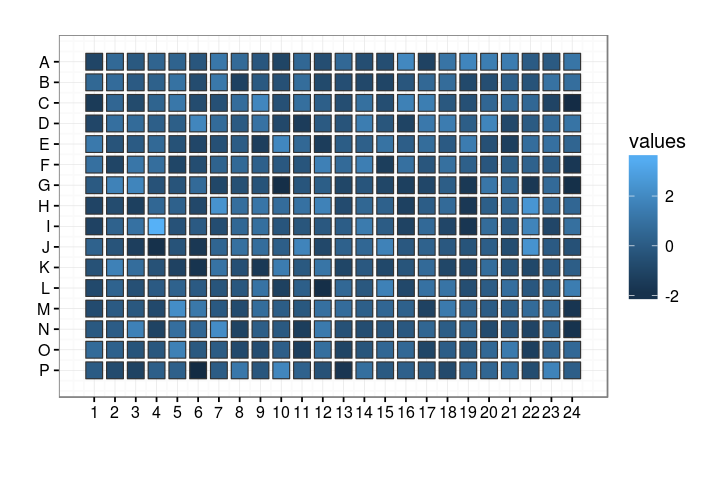

In [2]:
# example dataframe
df <- data.frame(vals = rnorm(1:384),
                 well = num_to_well(1:384, plate = 384))

raw_map(data = df$vals,
        well = df$well,
        plate = 384)

These plots can be modified with additional ggplot functions.

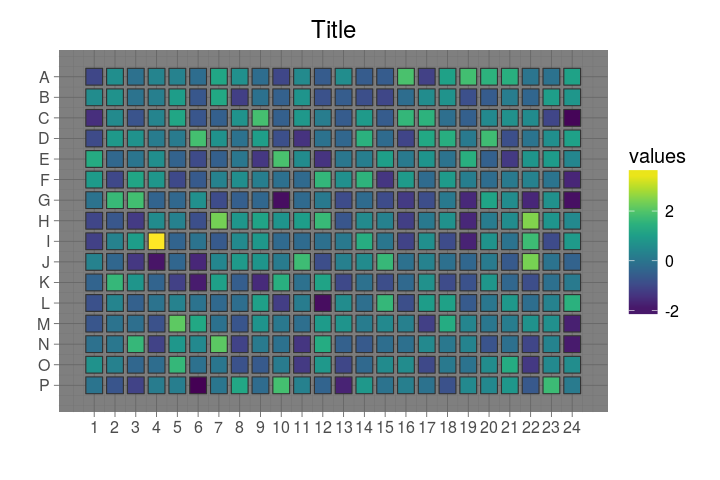

In [3]:
raw_map(data = df$vals,
        well = df$well,
        plate = 384) + 
    ggtitle("Title") + 
    theme_dark() +
    scale_fill_viridis()

The platemaps handle missing wells without any trouble.

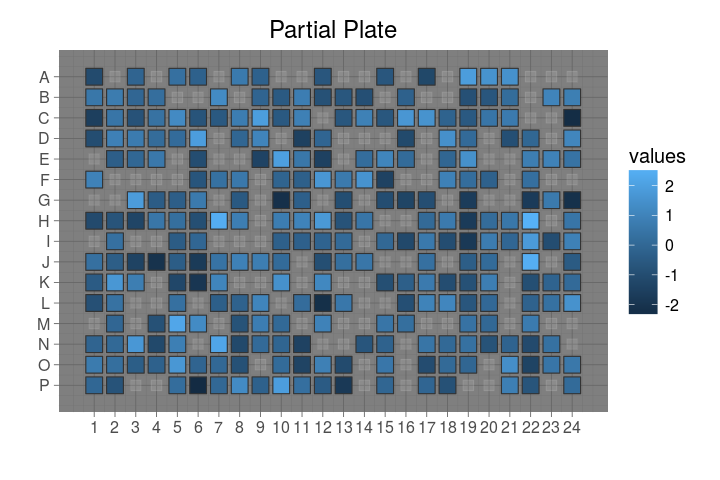

In [4]:
# randomly remove 30 % of the data
df_partial <- dplyr::sample_frac(df, 0.7)

raw_map(data = df_partial$vals,
        well = df_partial$well,
        plate = 384) +
    theme_dark() + 
    ggtitle("Partial Plate")

When scaling the values of multiple plates, we can choose to scale the data of all plates pooled together to allow comprisons between plates, or scale the plates individually with the `each` argument.

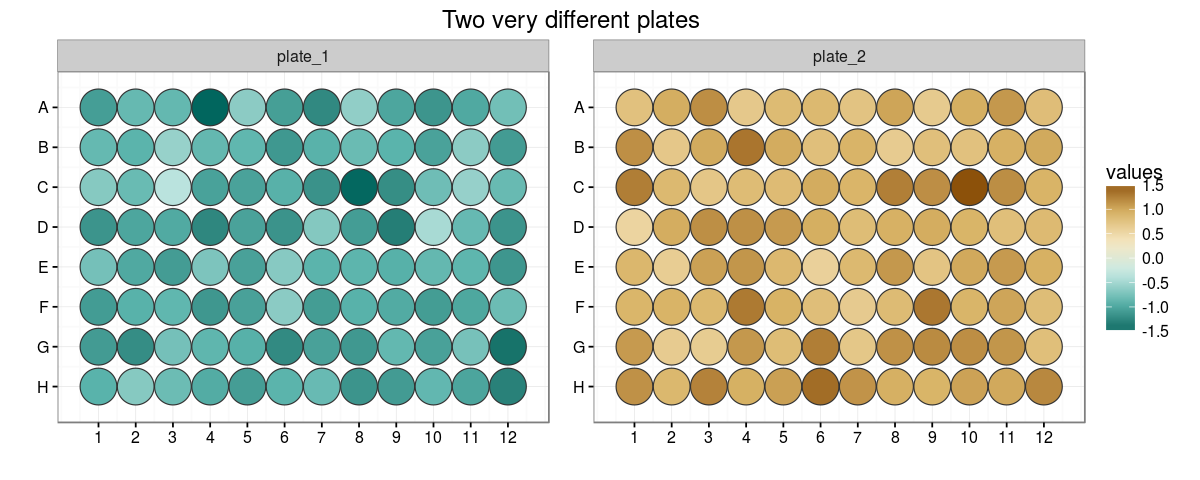

In [5]:
# figure size for jupyter notebook
options(repr.plot.width = 10)
options(repr.plot.height = 4)

vals <- c(rnorm(96), rnorm(96, mean = 10))
wells <- rep(num_to_well(1:96), 2)
plate_id <- rep(c("plate_1", "plate_2"), each = 96)

z_grid(data = vals,
       well = wells,
       plate_id = plate_id) +
    scale_fill_distiller(type = "div") +
    ggtitle("Two very different plates")

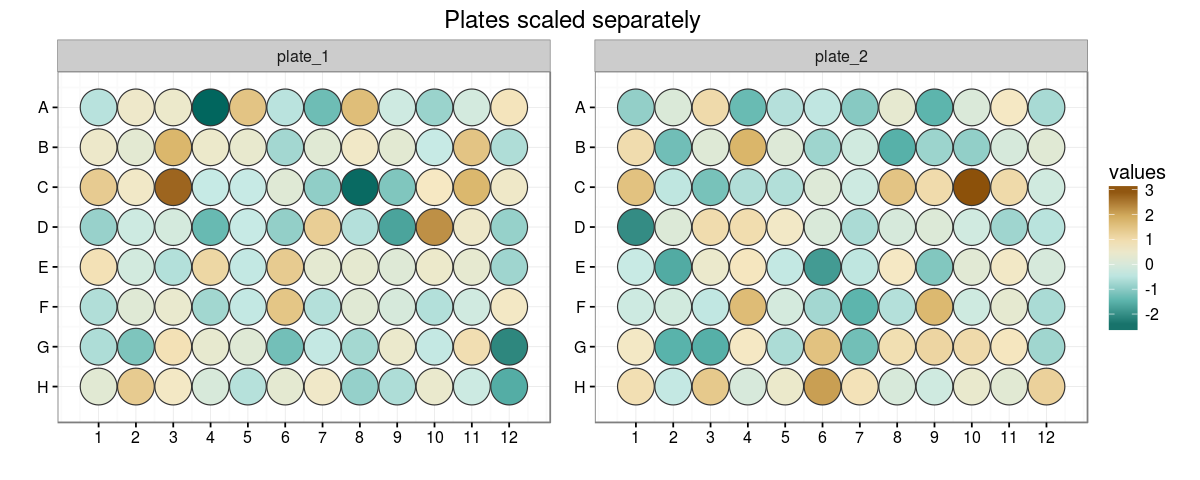

In [6]:
z_grid(data = vals,
       well = wells,
       plate_id = plate_id,
       each = TRUE) +
    scale_fill_distiller(type = "div") +
    ggtitle("Plates scaled separately")

### Dealing with spatial effects

There are also tools to remove any systematic spatial effects within a plate.

Here's a real-world example where a plate has an edge-effect, with lower values in the peripheral wells. We can use the function `b_map` (b for b-score).

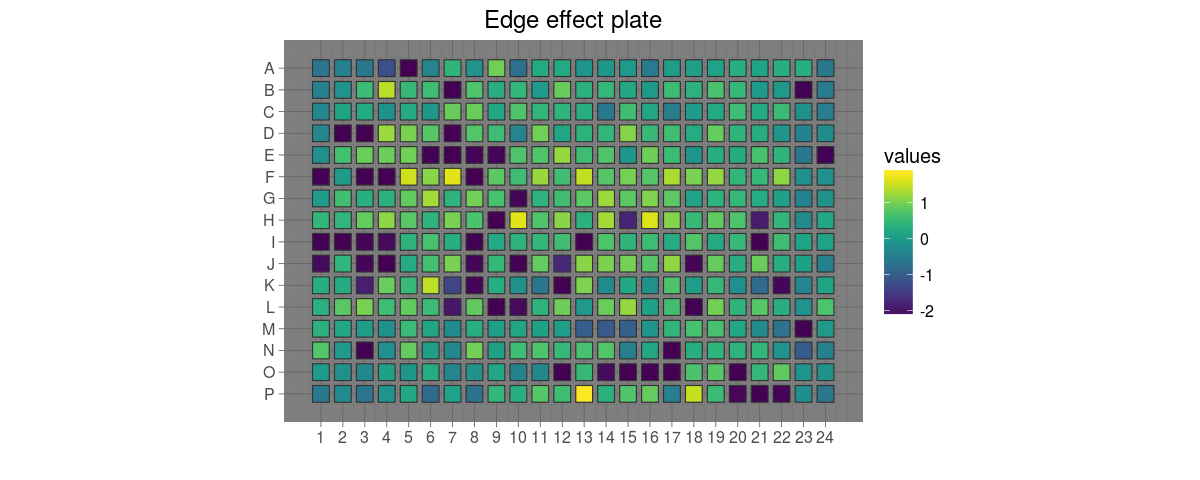

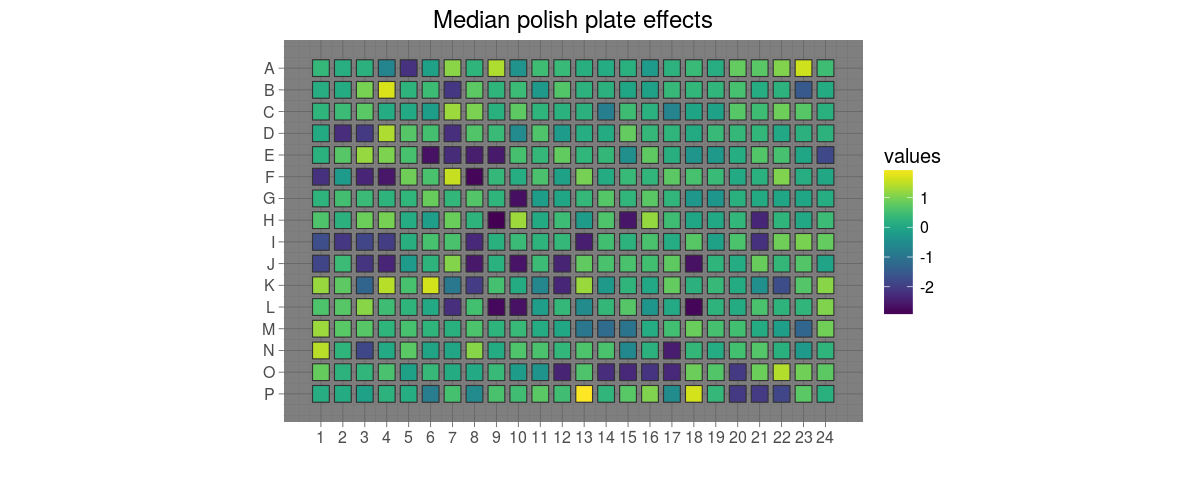

In [8]:
# normal data
z_map(data = df_edge$Count_Nuclei,
      well = df_edge$Metadata_Well,
      plate = 384) +
    theme_dark() +
    scale_fill_viridis() +
    ggtitle("Edge effect plate")

# polished data
b_map(data = df_edge$Count_Nuclei,
      well = df_want$Metadata_Well,
      plate = 384) +
    theme_dark() +
    scale_fill_viridis() +
    ggtitle("Median polish plate effects")

### Hit maps

We can also plot the location of 'hits', that is well with values above or below a threshold.  
The `hit_map` function defaults to categorising wells as 'hits' or 'negative hits' for those values abve or below 2 standard deviations of the plate average.

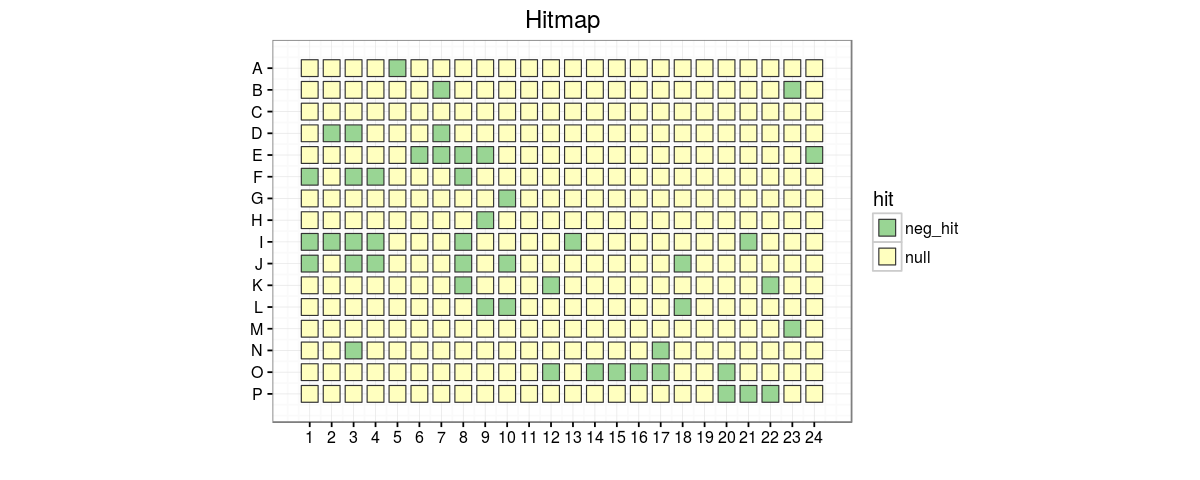

In [12]:
hit_map(data = df_want$Count_Nuclei,
        well = df_want$Metadata_Well,
         plate = 384) + 
    ggtitle("Hitmap")

Though we can alter this threshold by passing a value to the `threshold` argument.

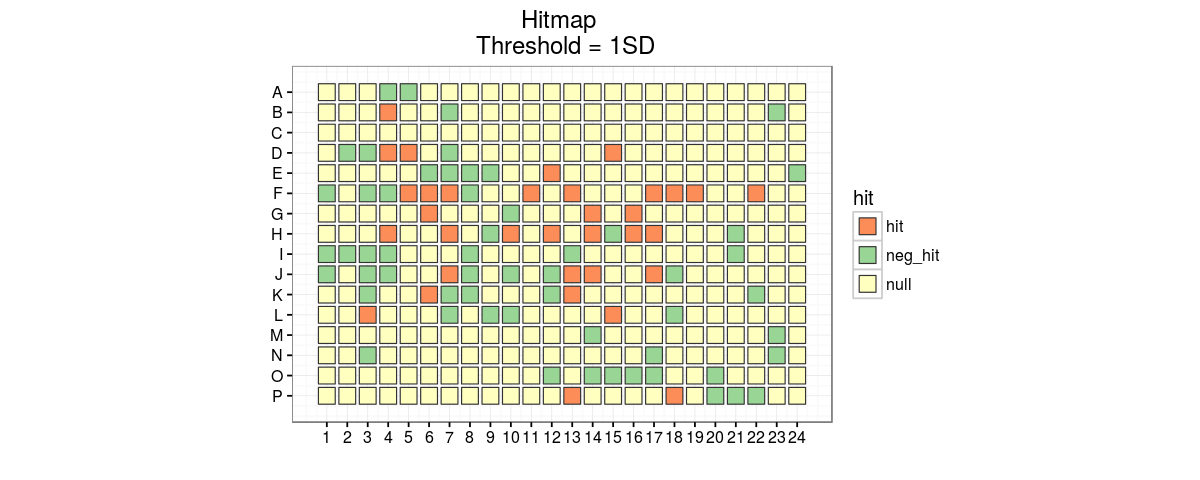

In [13]:
hit_map(data = df_want$Count_Nuclei,
        well = df_want$Metadata_Well,
        plate = 384,
        threshold = 1) + 
    ggtitle("Hitmap \n Threshold = 1SD")

There is also the option to remove any plate-effects before calculating the hits, we can do this by prepending the function with 'b'.

1: 35299.75
2: 34926.62
Final: 34895.31


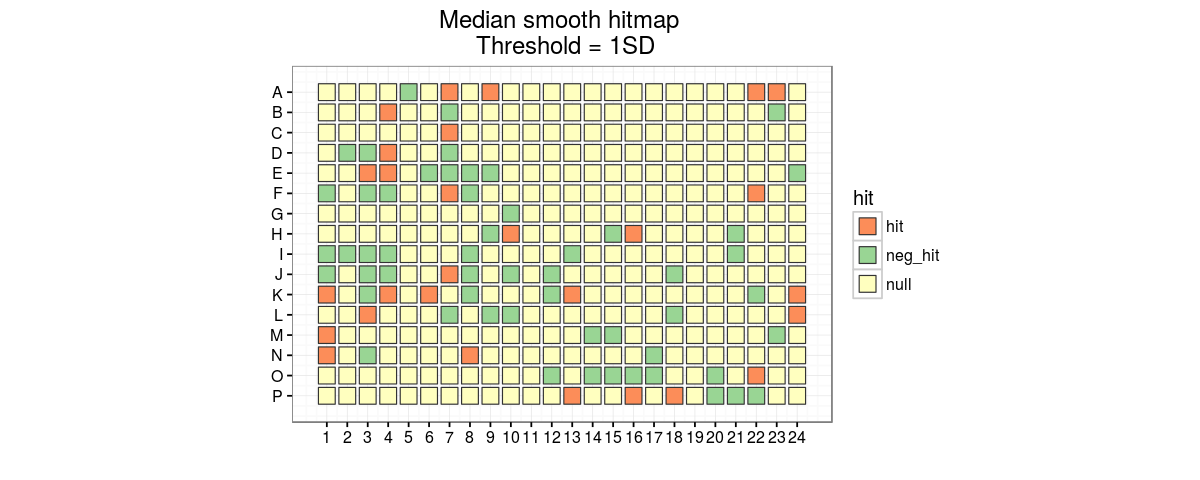

In [14]:
bhit_map(data = df_want$Count_Nuclei,
        well = df_want$Metadata_Well,
        plate = 384,
        threshold = 1) + 
    ggtitle("Median smooth hitmap \n Threshold = 1SD")